In [34]:
from pyprojroot import here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [35]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize confusion matrix

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

In [9]:
df = pd.read_csv(here("data/Multi-class/IRIS/IRIS.csv"))
print(df.shape)
print(df.columns)

(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [10]:
print(df.isna().sum())
print()
print(df.dtypes)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [14]:
print(df["species"].unique())
print(df["species"].value_counts())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [15]:
string_to_int = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
# Applying the mapping to the column
df['species'] = df['species'].map(string_to_int)

In [25]:
X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
Y = df["species"].values
print(type(X), X.shape)
print(type(Y), Y.shape)

<class 'numpy.ndarray'> (150, 4)
<class 'numpy.ndarray'> (150,)


In [32]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


Logistic Regression Accuracy: 1.0


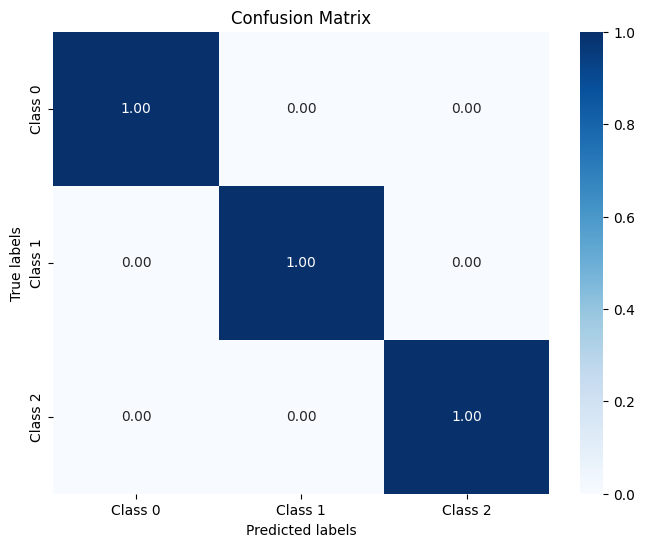

Decision Tree Accuracy: 1.0


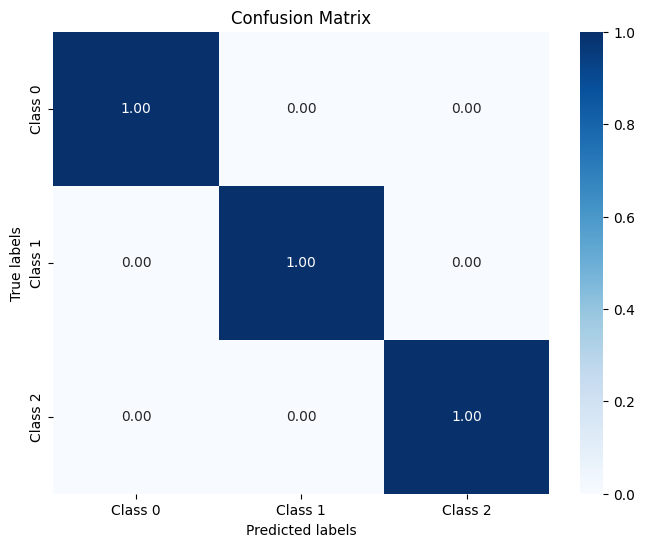

Random Forest Accuracy: 1.0


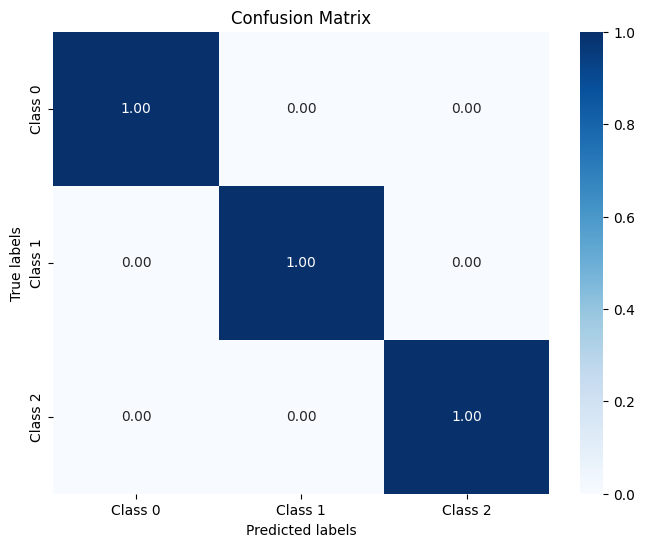

Support Vector Machine Accuracy: 1.0


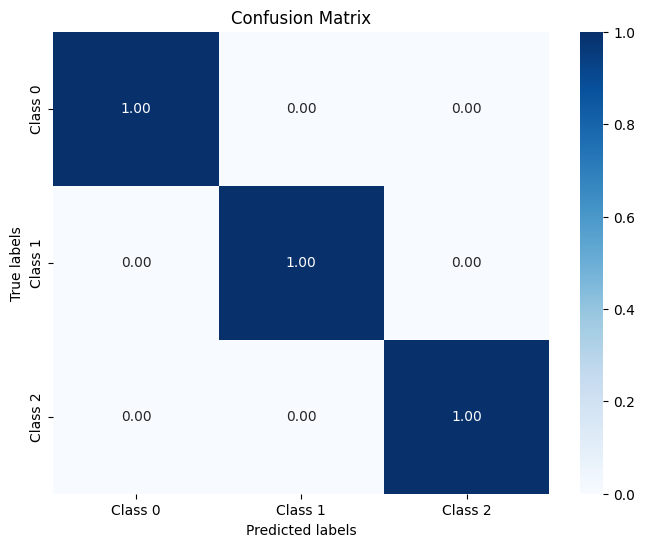

In [36]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy}')
    plot_confusion_matrix(y_test, y_pred, class_names=['Class 0', 'Class 1', 'Class 2'])